<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>


## <o>Day 05</o>: <m>(__Num 4 ML__)</m>

> <c>Applications of Matrix Decompositions</c> 
##### <m> PCA </m>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as SK
from sklearn.decomposition import PCA

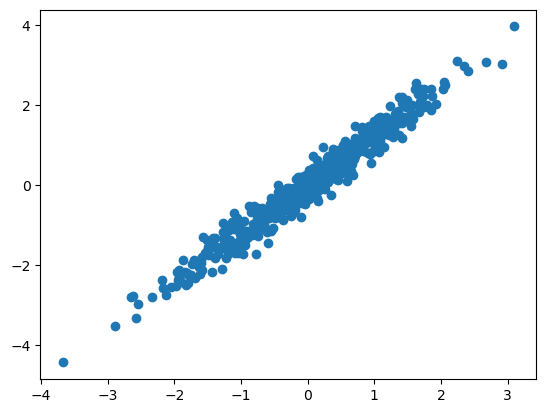

In [2]:
mu = np.array([0,0])
cov = np.array([[1.0,1.2],[1.2,1.5]])

Data = np.random.multivariate_normal(mean=mu,cov=cov,size=500)
plt.scatter(Data[:,0],Data[:,1])
plt.show()

In [3]:
def pca(D):
    C = np.cov(D.T)
    Eval,Evec = np.linalg.eig(C)
    return Eval,Evec 

In [4]:
lam,W = pca(Data)
print(f"The EignValues are {lam}, and EignVecs are \n{W}.")

The EignValues are [0.02711632 2.63600621], and EignVecs are 
[[-0.77410872 -0.63305267]
 [ 0.63305267 -0.77410872]].


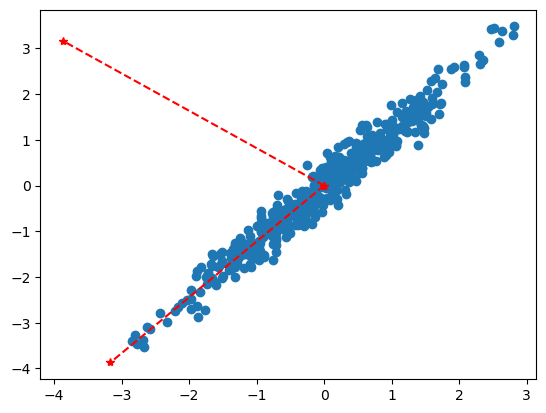

In [5]:
plt.scatter(Data[:,0],Data[:,1])
plt.plot([0,5*W[0,0]],[0,5*W[1,0]],'r*--')
plt.plot([0,5*W[0,1]],[0,5*W[1,1]],'r*--')
plt.show()

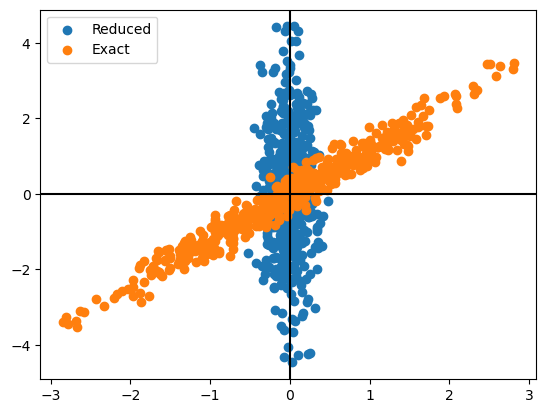

In [6]:
NewData = Data.dot(W[:])
plt.scatter(NewData[:,0],NewData[:,1],label="Reduced")
plt.scatter(Data[:,0],Data[:,1],label="Exact")
plt.axvline(0,color='black')
plt.axhline(0,color='black')
plt.legend()
plt.show()

In [7]:
print(f"Covariance of new Data is\n {np.cov(NewData.T)}")

Covariance of new Data is
 [[2.71163207e-02 1.10799813e-16]
 [1.10799813e-16 2.63600621e+00]]


### Using Sklearn PCA

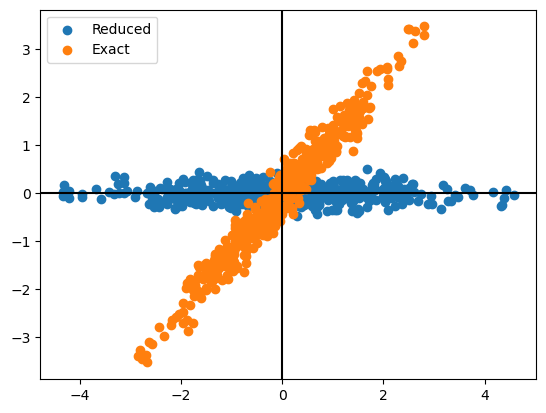

In [8]:
model = PCA(n_components=2)
X = model.fit_transform(Data)
NewData = model.inverse_transform(X)
plt.scatter(X[:,0],X[:,1],label="Reduced")
plt.scatter(NewData[:,0],NewData[:,1],label="Exact")
plt.axvline(0,color='black')
plt.axhline(0,color='black')
plt.legend()
plt.show()

### Loading MNIST Dataset with csv

In [9]:
MNISTData = pd.read_csv("./Datasets/train.csv")
print(f"The shape of Data is {MNISTData.shape}")
MNISTData.head()

The shape of Data is (42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
X = MNISTData.values[:100,1:]

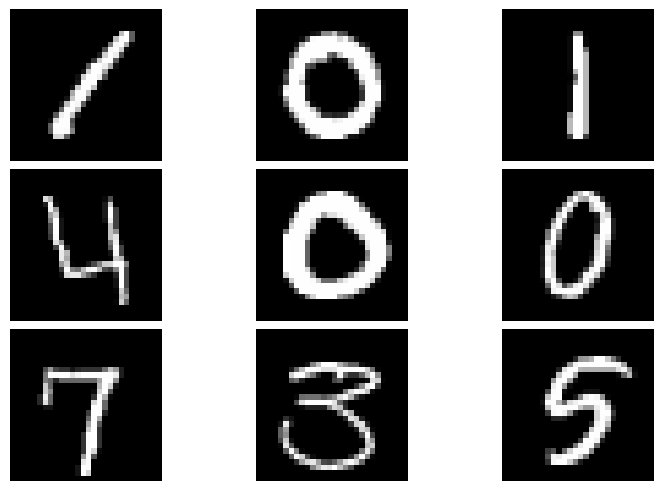

In [11]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=plt.figaspect(0.65),layout="constrained")
axes = axes.flatten()
for i in range(9):
    axes[i].imshow(X[i,:].reshape(28,28),cmap='grey')
    axes[i].axis("off")
plt.show()

In [12]:
Evals,Evecs = pca(np.cov(X.T))

/usr/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


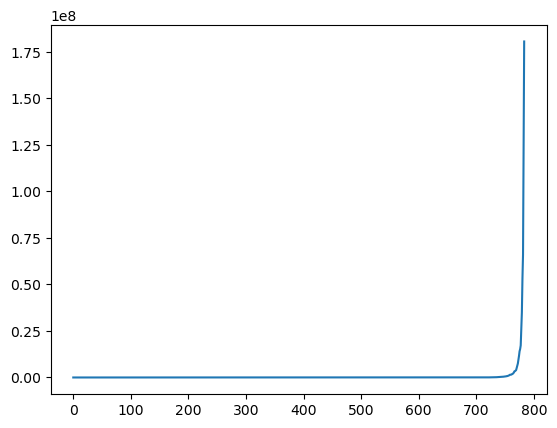

In [13]:
plt.plot(np.sort(Evals,axis=None))
plt.show()

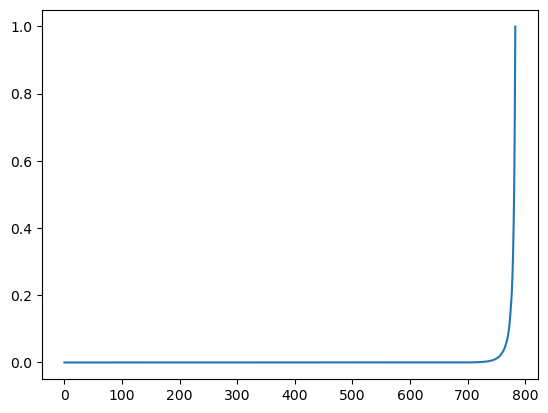

In [14]:
SortedEvals,SortedEvecs = np.asarray(np.sort(Evals,axis=None)),np.asarray(np.sort(Evecs,axis=None))
Variance = np.cumsum(SortedEvals/SortedEvals.sum())
plt.plot(Variance)

In [15]:
NewPCA = PCA(n_components=10)
tmp = NewPCA.fit_transform(X) 
ReducedData = NewPCA.inverse_transform(tmp)

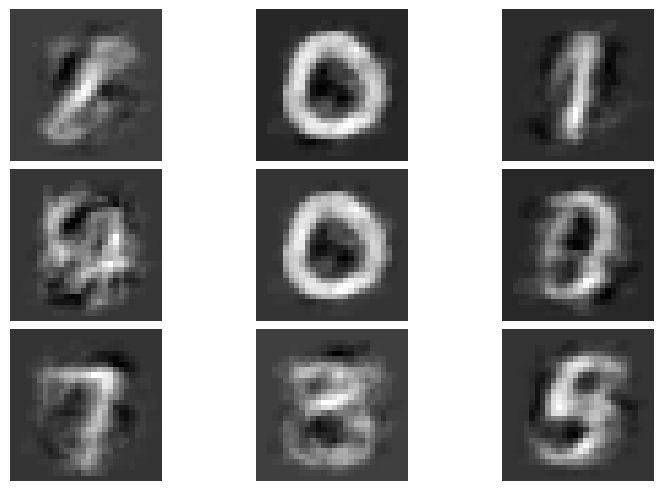

In [16]:
fig,axes = plt.subplots(nrows=3,ncols=3,figsize=plt.figaspect(0.65),layout="constrained")
axes = axes.flatten()
for i in range(9):
    axes[i].imshow(ReducedData[i,:].reshape(28,28),cmap='grey')
    axes[i].axis("off")
plt.show()